<a href="https://colab.research.google.com/github/palakuriswamy/III-H-assigements-/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is

*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

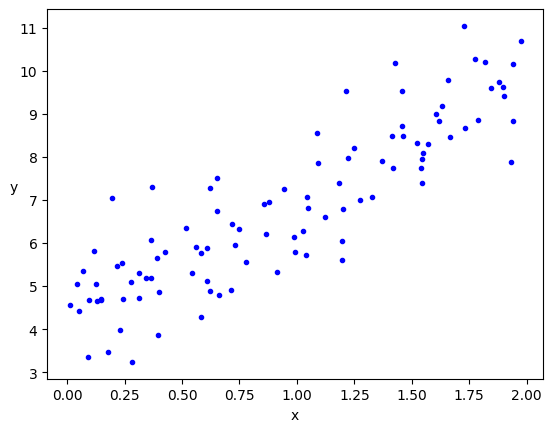

In [5]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [6]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [7]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [8]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

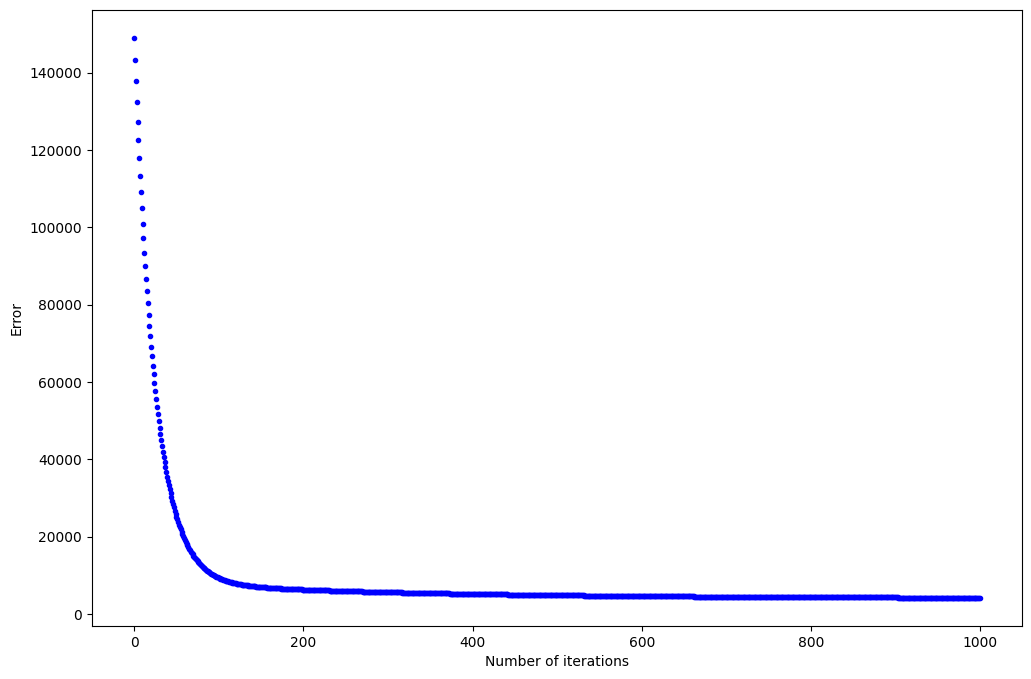

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

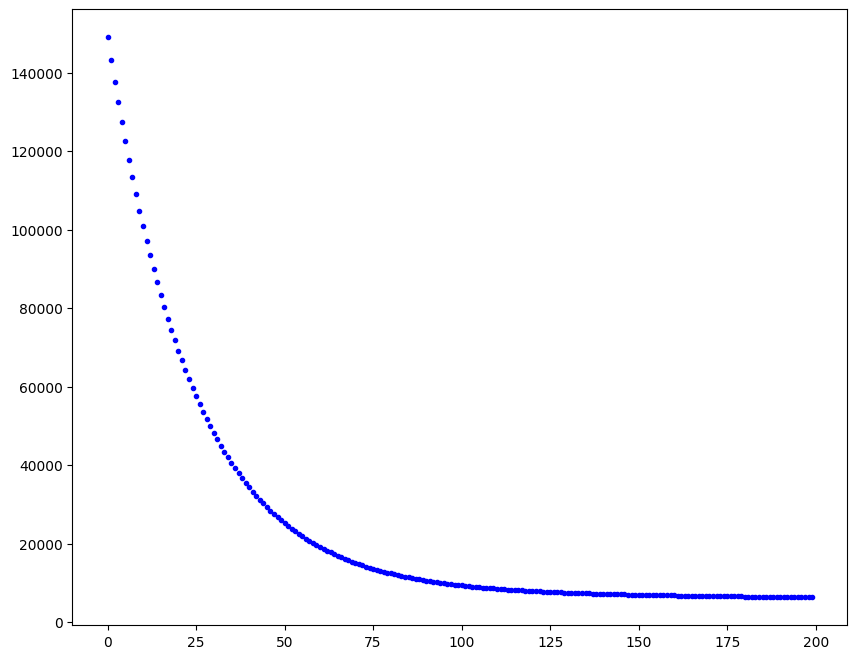

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [11]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [12]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


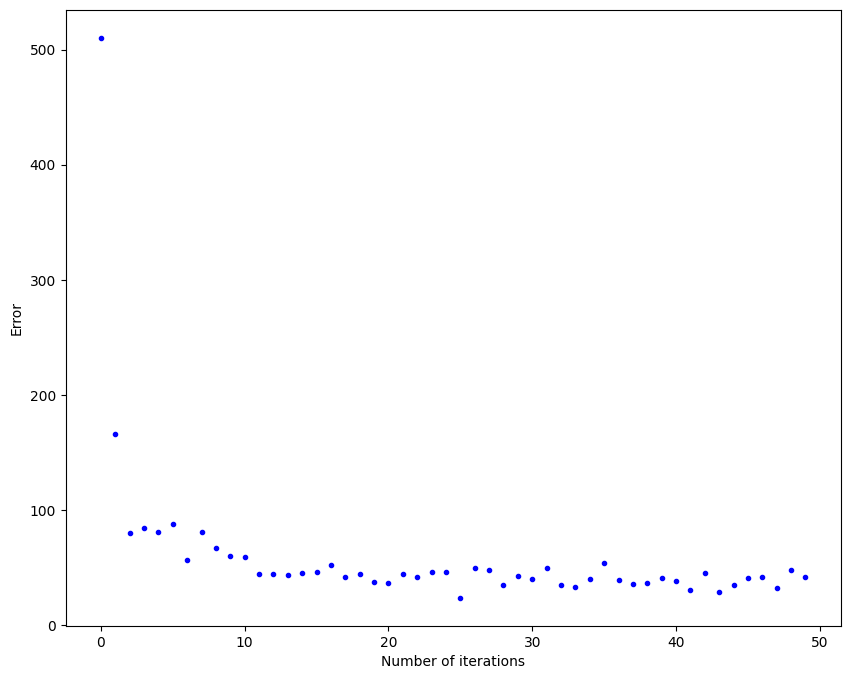

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [14]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [15]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


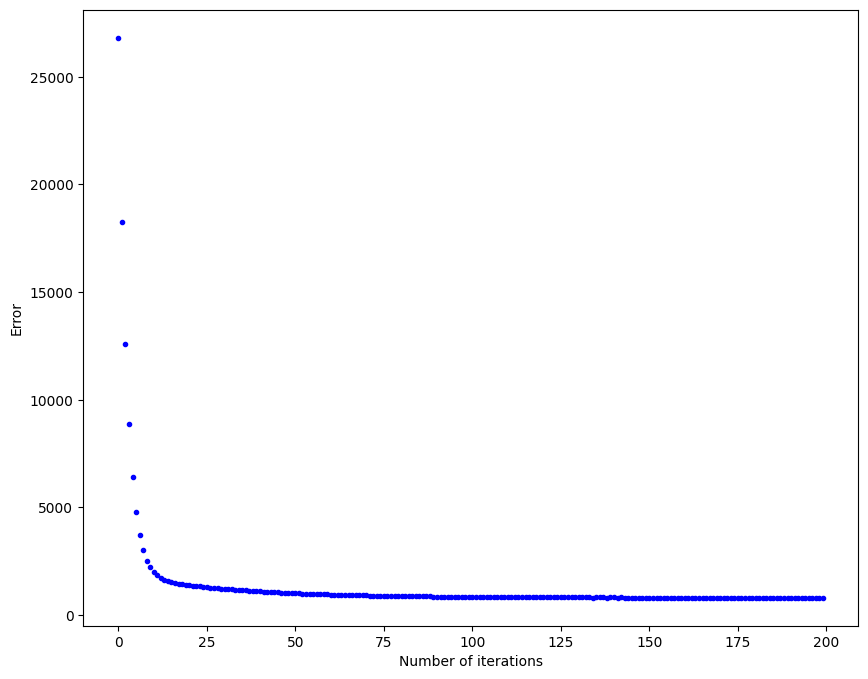

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

                    **ANSWERS**

1.Change batch size in mini-batch gradient descent?

  In mini-batch gradient descent, the batch size is a hyperparameter that determines the number of examples used in each iteration to update the model parameters. It is a compromise between the computational efficiency of stochastic gradient descent (using one example at a time) and the stability of batch gradient descent (using the entire dataset). The batch size is typically chosen based on the available computational resources and the characteristics of the dataset.

In [17]:
# Change the batch size to your desired value, for example, 30
new_batch_size = 30

# Call minibatch_gradient_descent with the updated batch size
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, new_batch_size)

# Print the results
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 4.194
y_pred[1]: 2.787
Final error: 1164.734


2.Test all the three out on real datasets?

Batch Gradient Descent (BGD):

Overview: Batch Gradient Descent considers the entire training dataset in each iteration. Key Equation: wk+1←wk−ηΔJwk+1←wk−ηΔJ Implemented Functions: cal_cost(y_pred, X, y): Calculates the cost function. gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100): Implements Batch Gradient Descent.

Stochastic Gradient Descent (SGD):

Overview: SGD processes one training example at a time for each iteration, suitable for large datasets. Key Equation: ypredj:=ypredj−α1m∑i=1m(h(ypred(i)−y(i)).Xj(i)ypredj​​:=ypredj​​−αm1​∑i=1m​(h(ypred(i)​−y(i)).Xj(i)​Implemented Functions: stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10): Implements Stochastic Gradient Descent

Mini-Batch Gradient Descent:

Overview: Mini-Batch Gradient Descent processes a batch of a fixed number of training examples in each iteration, striking a balance between BGD and SGD. Key Equation: Similar to SGD but processes a batch of examples. Implemented Functions: minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20): Implements Mini-Batch Gradient Descent.

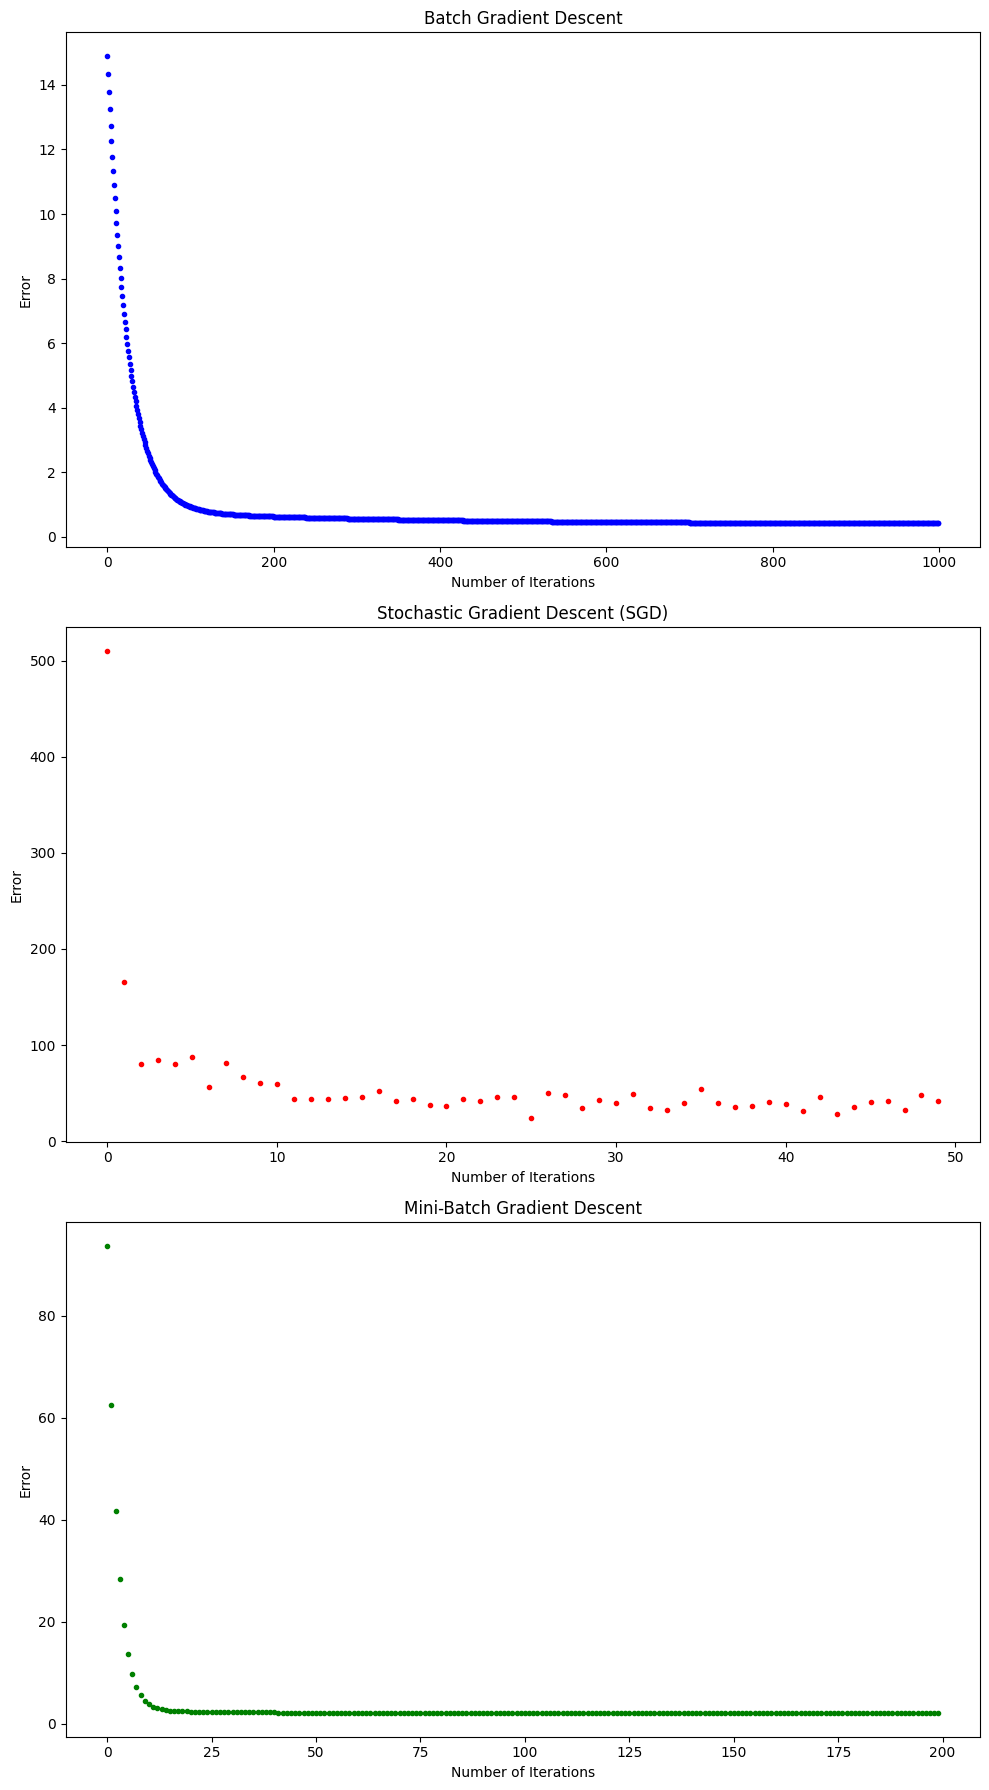

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate cost
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Batch Gradient Descent
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Generating synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Batch Gradient Descent
lr_batch = 0.01
n_iter_batch = 1000
y_pred_batch = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred_batch, cost_history_batch = gradient_descent(X_b, y, y_pred_batch, lr_batch, n_iter_batch)

# Stochastic Gradient Descent
lr_sgd = 0.5
n_iter_sgd = 50
y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(
    np.c_[np.ones((len(X), 1)), X], y, np.random.randn(2, 1), lr_sgd, n_iter_sgd
)

# Mini-Batch Gradient Descent
lr_mini_batch = 0.1
n_iter_mini_batch = 200
y_pred_mini_batch, cost_history_mini_batch = minibatch_gradient_descent(X, y, np.random.randn(2, 1), lr_mini_batch, n_iter_mini_batch)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Batch Gradient Descent
axes[0].plot(range(n_iter_batch), cost_history_batch, 'b.')
axes[0].set_title('Batch Gradient Descent')
axes[0].set_xlabel('Number of Iterations')
axes[0].set_ylabel('Error')

# Stochastic Gradient Descent
axes[1].plot(range(n_iter_sgd), cost_history_sgd, 'r.')
axes[1].set_title('Stochastic Gradient Descent (SGD)')
axes[1].set_xlabel('Number of Iterations')
axes[1].set_ylabel('Error')

# Mini-Batch Gradient Descent
axes[2].plot(range(n_iter_mini_batch), cost_history_mini_batch, 'g.')
axes[2].set_title('Mini-Batch Gradient Descent')
axes[2].set_xlabel('Number of Iterations')
axes[2].set_ylabel('Error')

plt.tight_layout()
plt.show()


3.Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD?

To compare the effects of changing the learning rate in Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent (MBGD), let's consider the impact on convergence and final error for a fixed number of iterations. We will observe how each algorithm behaves with different learning rates

Batch GD - LR 0.001: Final Error - 13.200
SGD - LR 0.001: Final Error - 1064.979
Mini-batch GD - LR 0.001: Final Error - 93.091
Batch GD - LR 0.01: Final Error - 0.839
SGD - LR 0.01: Final Error - 73.934
Mini-batch GD - LR 0.01: Final Error - 7.007
Batch GD - LR 0.1: Final Error - 0.404
SGD - LR 0.1: Final Error - 38.747
Mini-batch GD - LR 0.1: Final Error - 2.022
Batch GD - LR 0.5: Final Error - 0.403
SGD - LR 0.5: Final Error - 38.777
Mini-batch GD - LR 0.5: Final Error - 2.008


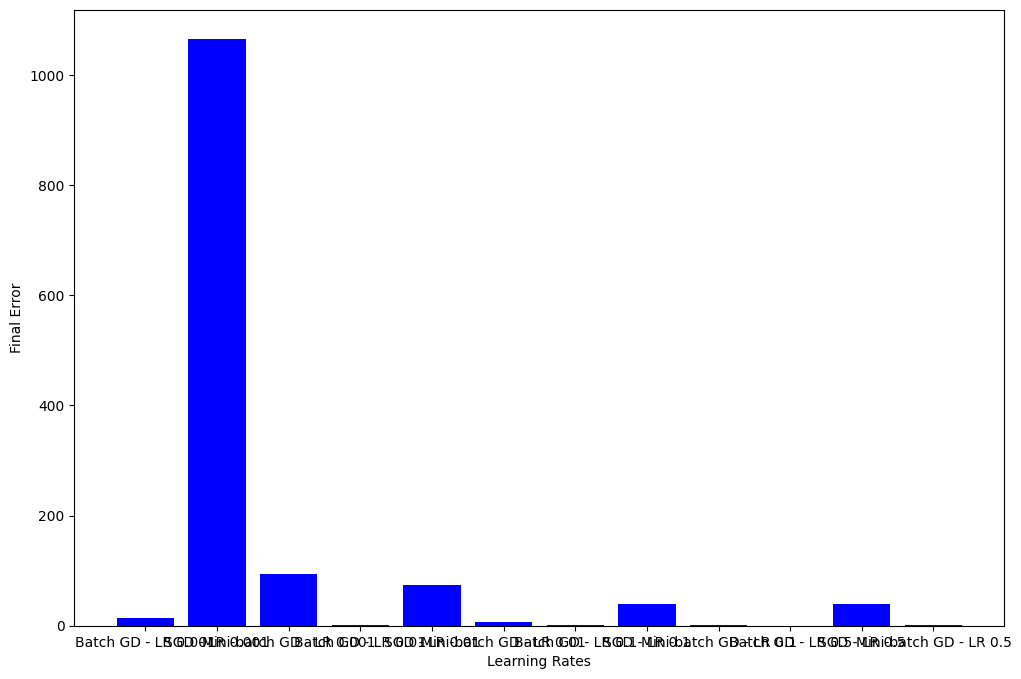

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code for data generation, cost calculation, and gradient descent functions)

def compare_learning_rates(X, y, lr_values, iterations=100):
    """
    Compare the effects of changing learning rates in Batch GD, SGD, and Mini-batch GD.

    Parameters:
        X: Input features
        y: Target values
        lr_values: List of learning rates to compare
        iterations: Number of iterations for gradient descent

    Returns:
        Dictionary containing final errors for each learning rate and algorithm.
    """
    results = {}

    for lr in lr_values:
        # Batch GD
        y_pred_bgd = np.random.randn(2, 1)
        X_bgd = np.c_[np.ones((len(X), 1)), X]
        _, cost_history_bgd = gradient_descent(X_bgd, y, y_pred_bgd, lr, iterations)
        results[f'Batch GD - LR {lr}'] = cost_history_bgd[-1]

        # SGD
        y_pred_sgd = np.random.randn(2, 1)
        X_sgd = np.c_[np.ones((len(X), 1)), X]
        _, cost_history_sgd = stocashtic_gradient_descent(X_sgd, y, y_pred_sgd, lr, iterations)
        results[f'SGD - LR {lr}'] = cost_history_sgd[-1]

        # Mini-batch GD
        y_pred_mbgd = np.random.randn(2, 1)
        _, cost_history_mbgd = minibatch_gradient_descent(X, y, y_pred_mbgd, lr, iterations)
        results[f'Mini-batch GD - LR {lr}'] = cost_history_mbgd[-1]

    return results

# Specify learning rates to compare
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Run the comparison
results = compare_learning_rates(X, y, learning_rates)

# Display the results
for key, value in results.items():
    print(f'{key}: Final Error - {value:0.3f}')

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel('Final Error')
ax.set_xlabel('Learning Rates')

for key, value in results.items():
    ax.bar(key, value, color='blue')

plt.show()
